In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 157ms/step - accuracy: 0.1987 - loss: 2.1878 - val_accuracy: 0.3187 - val_loss: 1.8953
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 156ms/step - accuracy: 0.3015 - loss: 1.9112 - val_accuracy: 0.3265 - val_loss: 1.8596
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 243s 155ms/step - accuracy: 0.3331 - loss: 1.8446 - val_accuracy: 0.3524 - val_loss: 1.8054
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 157ms/step - accuracy: 0.3467 - loss: 1.7972 - val_accuracy: 0.3670 - val_loss: 1.7594
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 245s 157ms/step - accuracy: 0.3602 - loss: 1.7730 - val_accuracy: 0.3854 - val_loss: 1.7223
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 157ms/step - accuracy: 0.3678 - loss: 1.7583 - val_accuracy: 0.3680 - val_loss: 1.7449
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 241s 154ms/step - accuracy: 0.3762 - loss: 1.7399 - val_accuracy: 0.3940 - val_loss: 1.6968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 155ms/step - ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.3904 - loss: 1.7207
Test accuracy: 0.3846000134944916


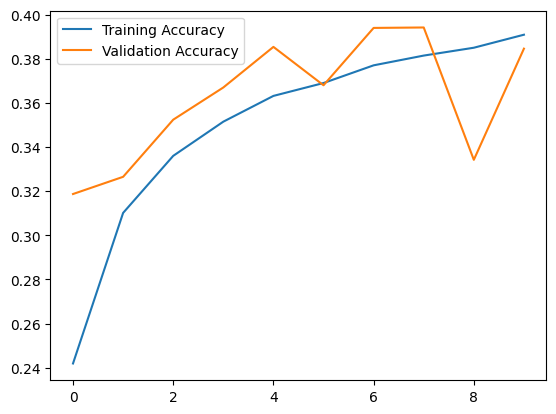

In [5]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [6]:
# Save model
model.save('resnet50_cifar10.h5')

# Load model (optional)
# loaded_model = tf.keras.models.load_model('resnet50_cifar10.h5')
